# Analisis Efektivitas Kampanye terhadap Penjualan Produk Supermarket

## Tujuan:
Mengukur efektivitas setiap kampanye dalam mendorong penjualan produk dan memberikan rekomendasi untuk strategi pemasaran mendatang.

## Pertanyaan Analisis:
1. Seberapa efektif setiap kampanye (AcceptedCmp1 hingga AcceptedCmp5 dan Response) dalam meningkatkan pengeluaran pelanggan pada masing-masing kategori produk (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds)?

2. Kampanye mana yang memiliki dampak terbesar terhadap penjualan untuk setiap kategori produk?

3. Bagaimana korelasi antara penerimaan kampanye dan penjualan produk?

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Data Understanding

In [277]:
# menampilkan data
df = pd.read_csv('Supermarket Customers.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [278]:
# melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [279]:
# menghapus kolom Z_Revenue dan Z_CostContact karena nilainya konstan
df = df.drop(['Z_Revenue', 'Z_CostContact'], axis=1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


In [280]:
# mengecek missing value
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [281]:
# mengubah tipe data year_birth dan dt_customer menjadi datetime dan id menjadi object
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['ID'] = df['ID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   datetime64[ns]
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [282]:
# menghapus missing value
df = df.dropna()
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [283]:
# mengecek duplikat
df.duplicated().sum()

0

## Derived Metrics (Penambahan Kolom Baru)

In [ ]:
# menambah kolom TotalSpending, Total_Purchases
df['TotalSpending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

/var/folders/rg/fpsm52vj7h14_zh73d1zl1100000gn/T/ipykernel_4510/2784203578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSpending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
/var/folders/rg/fpsm52vj7h14_zh73d1zl1100000gn/T/ipykernel_4510/2784203578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   object        
 1   Year_Birth           2216 non-null   datetime64[ns]
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [286]:
# mengecek missing value
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
TotalSpending          0
TotalPurchases         0
dtype: int64

In [287]:
# mengecek dupliakat
df.duplicated().sum()

0

## Variabel Numerik

In [288]:
# memanggil variabel numerik saja kecuali kolom AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Complain, Response, Kidhome, Teenhome
numerik = df.select_dtypes(include=['int64', 'float64']).drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response', 'Kidhome', 'Teenhome'], axis=1)
numerik

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalSpending,TotalPurchases
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,1617,22
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,27,4
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,776,20
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,53,6
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,422,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,1341,16
2236,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,444,15
2237,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,1241,18
2238,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,843,21


In [289]:
# numerik deskriptif
numerik.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalSpending,TotalPurchases
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,607.075361,12.557310
std,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,602.900476,7.204611
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,69.000000,6.000000
50%,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,396.500000,12.000000
75%,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,1048.000000,18.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,2525.000000,32.000000


In [290]:
numerik.info()
numerik.columns

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2216 non-null   float64
 1   Recency              2216 non-null   int64  
 2   MntWines             2216 non-null   int64  
 3   MntFruits            2216 non-null   int64  
 4   MntMeatProducts      2216 non-null   int64  
 5   MntFishProducts      2216 non-null   int64  
 6   MntSweetProducts     2216 non-null   int64  
 7   MntGoldProds         2216 non-null   int64  
 8   NumDealsPurchases    2216 non-null   int64  
 9   NumWebPurchases      2216 non-null   int64  
 10  NumCatalogPurchases  2216 non-null   int64  
 11  NumStorePurchases    2216 non-null   int64  
 12  NumWebVisitsMonth    2216 non-null   int64  
 13  TotalSpending        2216 non-null   int64  
 14  TotalPurchases       2216 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 277.

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'TotalSpending',
       'TotalPurchases'],
      dtype='object')

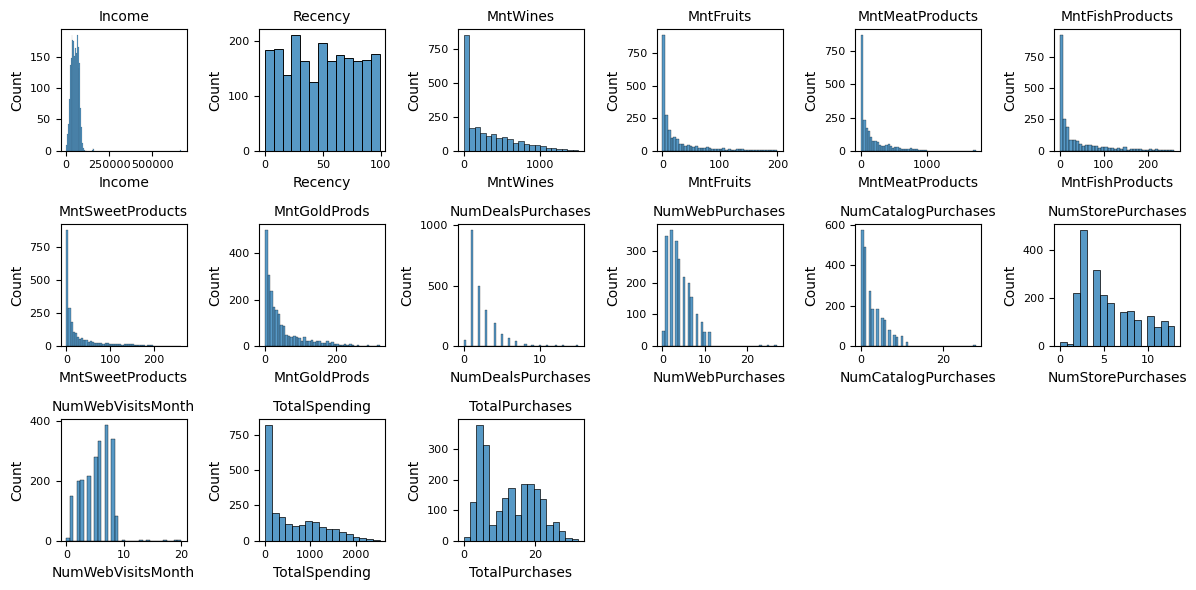

In [291]:
kolom = numerik.columns
# Menghitung layout grid yang optimal
jumlah_kolom = len(kolom)
# Menggunakan 6 kolom seperti pada contoh Anda
grid_kolom = 6
grid_baris = math.ceil(jumlah_kolom / grid_kolom)

# Membuat figure
plt.figure(figsize=(12, 6))

# Looping untuk setiap kolom dan membuat histogram
for i, nama_kolom in enumerate(kolom, 1):
    # Memeriksa apakah kita sudah melebihi jumlah subplot yang dapat ditampilkan
    if i > grid_baris * grid_kolom:
        break
        
    # Membuat posisi subplot
    plt.subplot(grid_baris, grid_kolom, i)
    
    # Membuat histogram - dengan penanganan kesalahan jika kolom tidak ada
    try:
        sns.histplot(df[nama_kolom])
        plt.title(nama_kolom, fontsize=10)
    except KeyError:
        plt.text(0.5, 0.5, f"Kolom '{nama_kolom}' tidak ditemukan", 
                ha='center', va='center', transform=plt.gca().transAxes)
    
    # Mengurangi ukuran font label x dan y
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

# Mengatur layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

## Variabel Kategorik

In [294]:
# memanggil variabel kategorik saja kecuali ID

kategorik = df.select_dtypes(include=['object'])
kategorik = kategorik.drop('ID', axis=1)
kategorik

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


In [295]:
# kategorik deskriptif
kategorik.describe()
kategorik

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


In [296]:
kategorik.info()
kategorik.columns

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Education       2216 non-null   object
 1   Marital_Status  2216 non-null   object
dtypes: object(2)
memory usage: 51.9+ KB


Index(['Education', 'Marital_Status'], dtype='object')

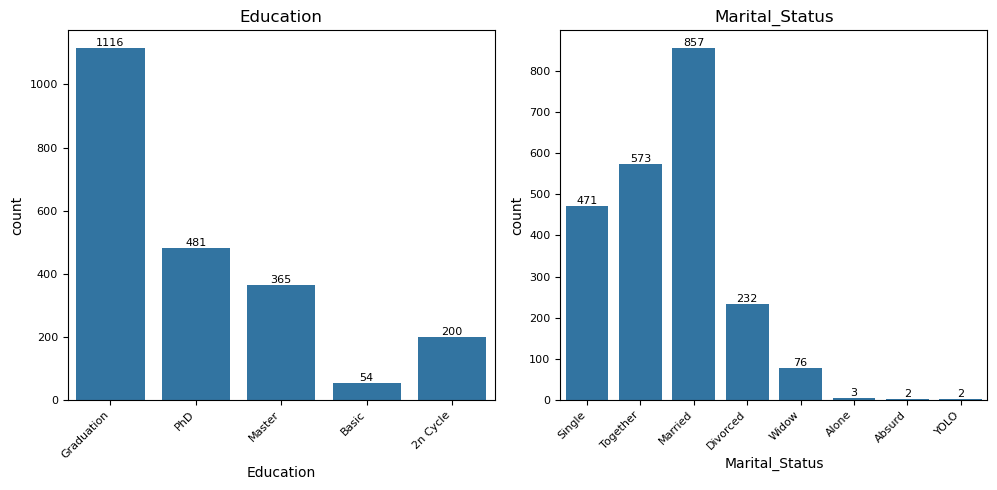

In [297]:
# Menggunakan kolom dari df_cat
kolom = kategorik.columns

# Menghitung layout grid yang optimal
jumlah_kolom = len(kolom)
# Menggunakan grid yang sesuai dengan jumlah kolom kategorikal (3 kolom)
grid_kolom = 3  # Karena hanya ada 3 kolom kategorikal
grid_baris = math.ceil(jumlah_kolom / grid_kolom)

# Membuat figure
plt.figure(figsize=(15, 5))  # Ukuran yang lebih proporsional untuk 3 kolom

# Looping untuk setiap kolom dan membuat countplot (untuk data kategorikal)
for i, nama_kolom in enumerate(kolom, 1):
    # Membuat posisi subplot
    plt.subplot(grid_baris, grid_kolom, i)
    
    # Membuat countplot untuk data kategorikal
    try:
        # Menggunakan countplot dari seaborn untuk data kategorikal
        ax = sns.countplot(x=nama_kolom, data=df_cat)
        plt.title(nama_kolom, fontsize=12)
        
        # Memutar label pada sumbu x jika terlalu panjang
        plt.xticks(rotation=45, ha='right', fontsize=8)
        plt.yticks(fontsize=8)
        
        # Menambahkan label jumlah di atas setiap bar
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=8)
    
    except Exception as e:
        plt.text(0.5, 0.5, f"Error: {str(e)}", 
                ha='center', va='center', transform=plt.gca().transAxes)

# Mengatur layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

# Uji Normalitas

In [308]:
# uji normalitas (kolmogorov-smirnov)
from scipy.stats import kstest

for column in numerik.columns:
    stat, pval=kstest(numerik[column], 'norm')
    if pval < 0.05:
        print(f'{column} Distribusi tidak normal (Tolak H0)')
    else:
        print(f'{column} Distribusi normal (Terima H0)')

Income Distribusi tidak normal (Tolak H0)
Recency Distribusi tidak normal (Tolak H0)
MntWines Distribusi tidak normal (Tolak H0)
MntFruits Distribusi tidak normal (Tolak H0)
MntMeatProducts Distribusi tidak normal (Tolak H0)
MntFishProducts Distribusi tidak normal (Tolak H0)
MntSweetProducts Distribusi tidak normal (Tolak H0)
MntGoldProds Distribusi tidak normal (Tolak H0)
NumDealsPurchases Distribusi tidak normal (Tolak H0)
NumWebPurchases Distribusi tidak normal (Tolak H0)
NumCatalogPurchases Distribusi tidak normal (Tolak H0)
NumStorePurchases Distribusi tidak normal (Tolak H0)
NumWebVisitsMonth Distribusi tidak normal (Tolak H0)
TotalSpending Distribusi tidak normal (Tolak H0)
TotalPurchases Distribusi tidak normal (Tolak H0)


In [309]:
# d'agustinus pearson
from scipy.stats import normaltest

for column in numerik.columns:
    stat, pval=normaltest(numerik[column])
    if pval < 0.05:
        print(f'Distribusi {column} tidak normal (Tolak H0)')
    else:
        print(f'Distribusi {column} normal (Terima H0)')

Distribusi Income tidak normal (Tolak H0)
Distribusi Recency tidak normal (Tolak H0)
Distribusi MntWines tidak normal (Tolak H0)
Distribusi MntFruits tidak normal (Tolak H0)
Distribusi MntMeatProducts tidak normal (Tolak H0)
Distribusi MntFishProducts tidak normal (Tolak H0)
Distribusi MntSweetProducts tidak normal (Tolak H0)
Distribusi MntGoldProds tidak normal (Tolak H0)
Distribusi NumDealsPurchases tidak normal (Tolak H0)
Distribusi NumWebPurchases tidak normal (Tolak H0)
Distribusi NumCatalogPurchases tidak normal (Tolak H0)
Distribusi NumStorePurchases tidak normal (Tolak H0)
Distribusi NumWebVisitsMonth tidak normal (Tolak H0)
Distribusi TotalSpending tidak normal (Tolak H0)
Distribusi TotalPurchases tidak normal (Tolak H0)


# Outliers

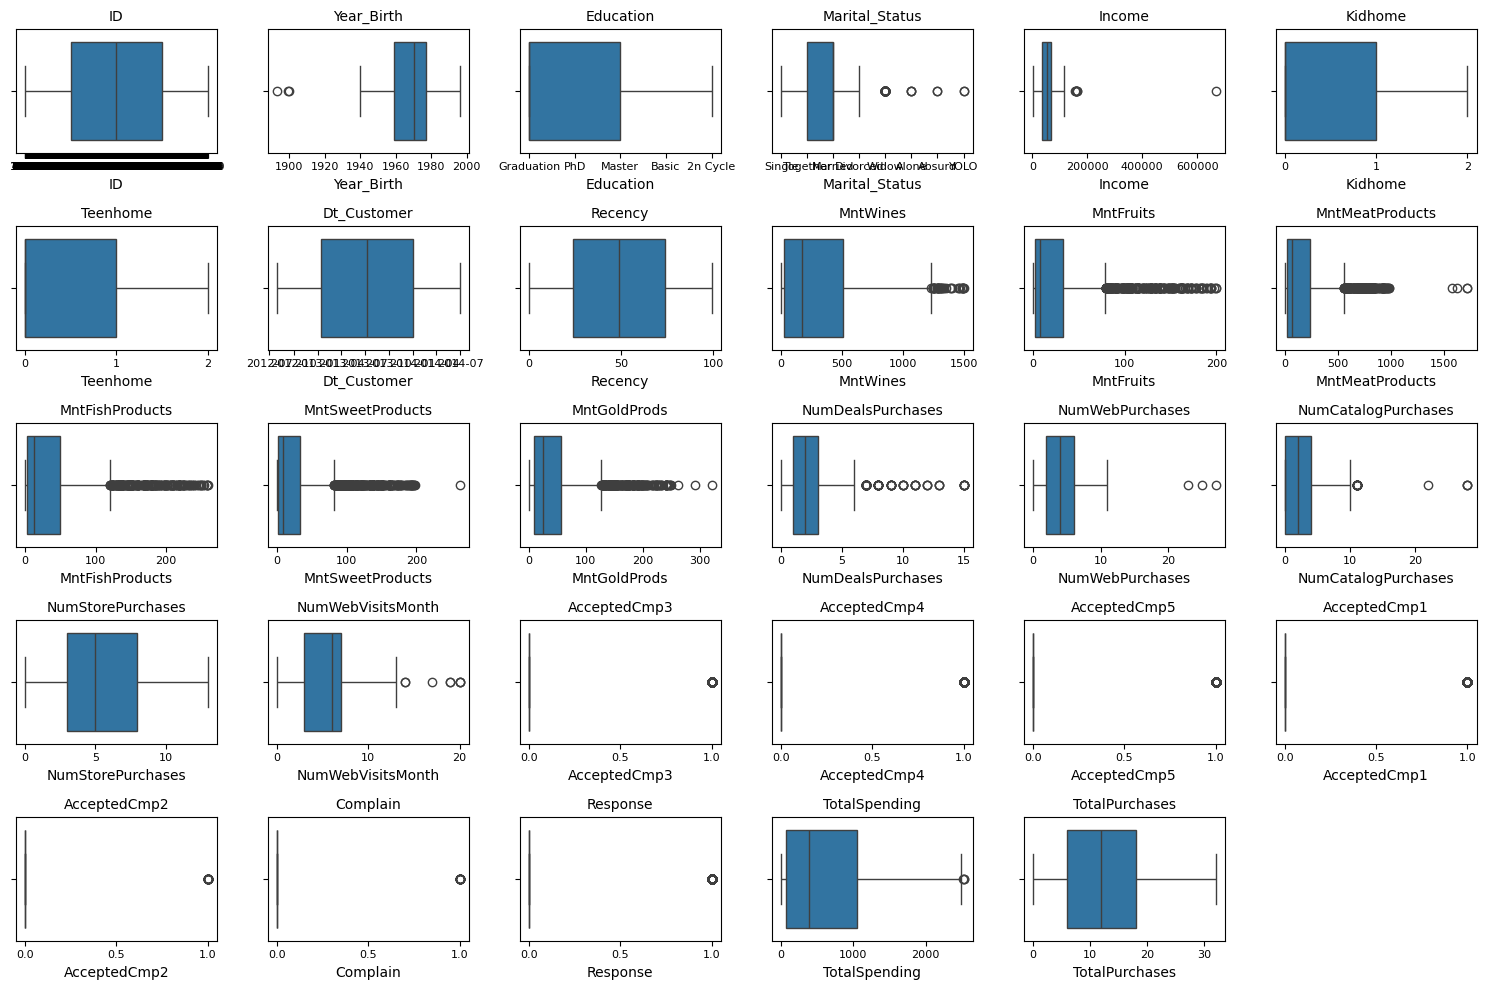

In [310]:
# mengecek outliers dengan boxplot
# Menggunakan kolom dari df_num berdasarkan gambar yang dikirimkan
kolom = df.columns  # Mengambil kolom dari df_num

# Menghitung layout grid yang optimal
jumlah_kolom = len(kolom)
# Menggunakan 6 kolom seperti pada contoh Anda
grid_kolom = 6
grid_baris = math.ceil(jumlah_kolom / grid_kolom)

# Membuat figure
plt.figure(figsize=(15, 10))

# Looping untuk setiap kolom dan membuat boxplot
for i, nama_kolom in enumerate(kolom, 1):
    # Memeriksa apakah kita sudah melebihi jumlah subplot yang dapat ditampilkan
    if i > grid_baris * grid_kolom:
        break
        
    # Membuat posisi subplot
    plt.subplot(grid_baris, grid_kolom, i)
    
    # Membuat boxplot
    try:
        sns.boxplot(x=df[nama_kolom])
        plt.title(nama_kolom, fontsize=10)
    except KeyError:
        plt.text(0.5, 0.5, f"Kolom '{nama_kolom}' tidak ditemukan", 
                ha='center', va='center', transform=plt.gca().transAxes)
    
    # Mengurangi ukuran font label x dan y
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

# Mengatur layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

In [311]:
# IQR 1.5
for nama_kolom in numerik.columns:
    q3 = numerik[nama_kolom].quantile(0.75)
    q1 = numerik[nama_kolom].quantile(0.25)
    iqr = q3 - q1
    batas_atas = q3 + (iqr * 1.5)
    batas_bawah = q1 - (iqr * 1.5)
    jumlah_outliers = len(numerik[(df[nama_kolom] > batas_atas) | (numerik[nama_kolom] < batas_bawah)])
    print(f'Jumlah Outliers {nama_kolom}: {jumlah_outliers}')

Jumlah Outliers Income: 8
Jumlah Outliers Recency: 0
Jumlah Outliers MntWines: 35
Jumlah Outliers MntFruits: 246
Jumlah Outliers MntMeatProducts: 174
Jumlah Outliers MntFishProducts: 222
Jumlah Outliers MntSweetProducts: 246
Jumlah Outliers MntGoldProds: 205
Jumlah Outliers NumDealsPurchases: 84
Jumlah Outliers NumWebPurchases: 3
Jumlah Outliers NumCatalogPurchases: 23
Jumlah Outliers NumStorePurchases: 0
Jumlah Outliers NumWebVisitsMonth: 8
Jumlah Outliers TotalSpending: 3
Jumlah Outliers TotalPurchases: 0


In [312]:
# Z-Score
for nama_kolom in numerik.columns:
    mean = numerik[nama_kolom].mean()
    std = numerik[nama_kolom].std()
    jumlah_outliers = len(numerik[(numerik[nama_kolom] < mean - 3 * std) | (numerik[nama_kolom] > mean + 3 * std)])
    print(f'Jumlah Outliers {nama_kolom}: {jumlah_outliers}')

Jumlah Outliers Income: 8
Jumlah Outliers Recency: 0
Jumlah Outliers MntWines: 15
Jumlah Outliers MntFruits: 64
Jumlah Outliers MntMeatProducts: 39
Jumlah Outliers MntFishProducts: 58
Jumlah Outliers MntSweetProducts: 61
Jumlah Outliers MntGoldProds: 46
Jumlah Outliers NumDealsPurchases: 31
Jumlah Outliers NumWebPurchases: 3
Jumlah Outliers NumCatalogPurchases: 4
Jumlah Outliers NumStorePurchases: 0
Jumlah Outliers NumWebVisitsMonth: 9
Jumlah Outliers TotalSpending: 5
Jumlah Outliers TotalPurchases: 0


## Mengidentifikasi Outliers dan Handling

Income

In [165]:
# mencari outlier pada Income yang lebih dari 150000
df[df['Income'] > 150000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending,TotalPurchases
164,8475,1973-01-01,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,0,1608,22
617,1503,1976-01-01,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,0,0,0,0,0,0,0,107,1
655,5555,1975-01-01,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,0,0,0,6,0
687,1501,1982-01-01,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,0,0,1717,29
1300,5336,1971-01-01,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,0,0,0,0,0,0,0,59,2
1653,4931,1977-01-01,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,1,0,0,0,0,0,0,0,1730,28
2132,11181,1949-01-01,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,0,8,0
2233,9432,1977-01-01,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,0,62,7


memilih untuk tidak menghapus outlier Income yang lebih dari 150000 karena data tersebut dianggap valid berdasarkan analisa background education dan usia pelanggan.

In [166]:
# Mencari outlier pada Income yang lebih dari 600000
df[df['Income'] > 600000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending,TotalPurchases
2233,9432,1977-01-01,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,0,62,7


In [167]:
# menghapus outlier pada kolom Income yang lebih dari 600000
df = df[df['Income'] < 600000]

memilih untuk menghapus outlier pada kolom Income yang lebih dari 600000 karena nilainya ekstrim

MntMeatProducts

In [168]:
# mencari outlier pada MntMeatProducts
df[df['MntMeatProducts'] > 1200]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending,TotalPurchases
21,5376,1979-01-01,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,1,0,0,0,0,0,0,0,1730,28
164,8475,1973-01-01,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,0,1608,22
687,1501,1982-01-01,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,0,0,1717,29
1653,4931,1977-01-01,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,1,0,0,0,0,0,0,0,1730,28


In [313]:
# Mengecek outliers tersebut secara spesifik
numerik[numerik['MntMeatProducts'] > 1200]


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalSpending,TotalPurchases
21,2447.0,42,1,1,1725,1,1,1,15,0,28,0,1,1730,28
164,157243.0,98,20,2,1582,1,2,1,15,0,22,0,0,1608,22
687,160803.0,21,55,16,1622,17,3,4,15,0,28,1,0,1717,29
1653,157146.0,13,1,0,1725,2,1,1,0,0,28,0,1,1730,28


In [321]:
# Menghapus data by index 21 karena tidak logic (pelanggan berbelanja meat mendekati income pelanggan)
df = df.drop(df.index[21])
df = df.reset_index(drop=True)

MntSweetProducts

In [171]:
# mencari outlier pada kolom MntSweetProducts yang lebih dari 250
df[df['MntSweetProducts'] > 250]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending,TotalPurchases
1880,4619,1945-01-01,PhD,Single,113734.0,0,0,2014-05-28,9,6,...,1,0,0,0,0,0,0,0,277,27


In [302]:
# Mengecek outliers tersebut secara spesifik
numerik[numerik['MntSweetProducts'] > 250]

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalSpending,TotalPurchases
1898,113734.0,9,6,2,3,1,262,3,0,27,0,0,1,277,27


In [173]:
# mengecek nilai tertinggi yang ada pada kolom TotalPurchases
df['TotalPurchases'].max()

32

Memilih untuk tidak menghapus outlier pada kolom MntSweetProducts karena nilai TotalPurchases yang tinggi (mendekati nilai max)

MntGoldProds

In [174]:
# mencari outlier pada kolom MntGoldProds yang lebih dari 250
df[df['MntGoldProds'] > 250]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending,TotalPurchases
1314,4246,1982-01-01,Master,Single,6560.0,0,0,2013-12-12,2,67,...,17,0,0,0,0,0,0,0,373,2
1788,6237,1966-01-01,PhD,Single,7144.0,0,2,2013-12-07,92,81,...,0,0,0,0,0,0,0,0,416,25
1957,10311,1969-01-01,Graduation,Married,4428.0,0,1,2013-10-05,0,16,...,1,0,0,0,0,0,0,0,359,25


In [314]:
# Mengecek outliers tersebut secara spesifik
numerik[numerik['MntGoldProds'] > 250]

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalSpending,TotalPurchases
1328,6560.0,2,67,11,26,4,3,262,0,1,0,1,17,373,2
1806,7144.0,92,81,4,33,5,2,291,0,23,1,1,0,416,25
1975,4428.0,0,16,4,12,2,4,321,0,25,0,0,1,359,25


In [176]:
# mengecek nilai tertinggi yang ada pada kolom MntGoldProds
df['MntGoldProds'].max()

321

Memilih untuk tidak menghapus outlier MntGoldProds karena spending nya termasuk lumayan tinggi

NumDealsPurchases

In [177]:
# mencari outlier pada kolom NumDealsPurchases yang lebih dari 14
df[df['NumDealsPurchases'] > 14]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending,TotalPurchases
20,5376,1979-01-01,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,1,0,0,0,0,0,0,0,1730,28
152,8475,1973-01-01,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,0,1608,22
418,238,1967-01-01,2n Cycle,Together,67309.0,1,1,2013-01-23,76,515,...,7,0,0,0,0,0,0,0,1082,24
673,1501,1982-01-01,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,0,0,1717,29
1028,10749,1991-01-01,Graduation,Single,8028.0,0,0,2012-09-18,62,73,...,19,0,0,0,0,0,0,0,178,1
1231,6862,1971-01-01,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,...,20,0,0,0,0,0,0,0,8,0
1828,9931,1963-01-01,PhD,Married,4023.0,1,1,2014-06-23,29,5,...,19,0,0,0,0,0,0,0,9,0


In [315]:
# Mengecek outliers tersebut secara spesifik
numerik[numerik['NumDealsPurchases'] > 14]

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalSpending,TotalPurchases
21,2447.0,42,1,1,1725,1,1,1,15,0,28,0,1,1730,28
164,157243.0,98,20,2,1582,1,2,1,15,0,22,0,0,1608,22
432,67309.0,76,515,47,181,149,95,95,15,9,6,9,7,1082,24
687,160803.0,21,55,16,1622,17,3,4,15,0,28,1,0,1717,29
1042,8028.0,62,73,18,66,7,12,2,15,0,1,0,19,178,1
1245,1730.0,65,1,1,3,1,1,1,15,0,0,0,20,8,0
1846,4023.0,29,5,0,1,1,1,1,15,0,0,0,19,9,0


In [179]:
# mengecek nilai tertinggi yang ada pada kolom TotalSpending
df['TotalSpending'].max()

2525

In [180]:
# Menghapus data by index 1042, 1245, 1846 karena total spendingnya sangat rendah
df = df.drop(df.index[[1042, 1245, 1846]])
df = df.reset_index(drop=True)

NumCatalogPurchases

In [322]:
# mencari outlier pada kolom NumCatalogPurchases yang lebih dari 20
df[df['NumCatalogPurchases'] > 20]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending,TotalPurchases
20,5376,1979-01-01,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,1,0,0,0,0,0,0,0,1730,28
152,8475,1973-01-01,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,0,1608,22
673,1501,1982-01-01,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,0,0,1717,29
1635,4931,1977-01-01,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,1,0,0,0,0,0,0,0,1730,28


In [323]:
# Mengecek outliers tersebut secara spesifik
numerik[numerik['NumCatalogPurchases'] > 20]

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalSpending,TotalPurchases
21,2447.0,42,1,1,1725,1,1,1,15,0,28,0,1,1730,28
164,157243.0,98,20,2,1582,1,2,1,15,0,22,0,0,1608,22
687,160803.0,21,55,16,1622,17,3,4,15,0,28,1,0,1717,29
1653,157146.0,13,1,0,1725,2,1,1,0,0,28,0,1,1730,28


Memilih untuk tidak menghapus outlier NumCatalogPurchases karena spending nya termasuk lumayan tinggi

## Korelasi antar Variabel Numerik

In [318]:
# Korelasi antar variable numerik

numerik.corr(method='spearman')

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalSpending,TotalPurchases
Income,1.000000,0.007938,0.830056,0.582379,0.816815,0.577392,0.567087,0.505550,-0.195533,0.573262,0.791841,0.731752,-0.643667,0.850920,0.777879
Recency,0.007938,1.000000,0.016824,0.024804,0.026241,0.013278,0.024220,0.017290,0.008214,-0.002078,0.028665,0.003791,-0.018666,0.018856,0.011907
MntWines,0.830056,0.016824,1.000000,0.516551,0.824089,0.522182,0.505361,0.575458,0.053550,0.742434,0.822926,0.805352,-0.390695,0.928394,0.869071
MntFruits,0.582379,0.024804,0.516551,1.000000,0.713574,0.704316,0.691066,0.569533,-0.111871,0.473336,0.633081,0.582166,-0.444309,0.683442,0.627295
MntMeatProducts,0.816815,0.026241,0.824089,0.713574,1.000000,0.725851,0.697815,0.639645,-0.033745,0.683491,0.853744,0.779894,-0.493880,0.940218,0.864788
MntFishProducts,0.577392,0.013278,0.522182,0.704316,0.725851,1.000000,0.700131,0.564654,-0.123880,0.466296,0.655878,0.580711,-0.459944,0.694671,0.632165
MntSweetProducts,0.567087,0.024220,0.505361,0.691066,0.697815,0.700131,1.000000,0.540616,-0.108031,0.462105,0.627996,0.581463,-0.448658,0.669823,0.625363
MntGoldProds,0.505550,0.017290,0.575458,0.569533,0.639645,0.564654,0.540616,1.000000,0.090165,0.577533,0.649036,0.540362,-0.258359,0.691691,0.644409
NumDealsPurchases,-0.195533,0.008214,0.053550,-0.111871,-0.033745,-0.123880,-0.108031,0.090165,1.000000,0.284461,-0.043862,0.096532,0.395857,-0.015500,0.107895
NumWebPurchases,0.573262,-0.002078,0.742434,0.473336,0.683491,0.466296,0.462105,0.577533,0.284461,1.000000,0.621001,0.673902,-0.096936,0.729273,0.833066


<Axes: >

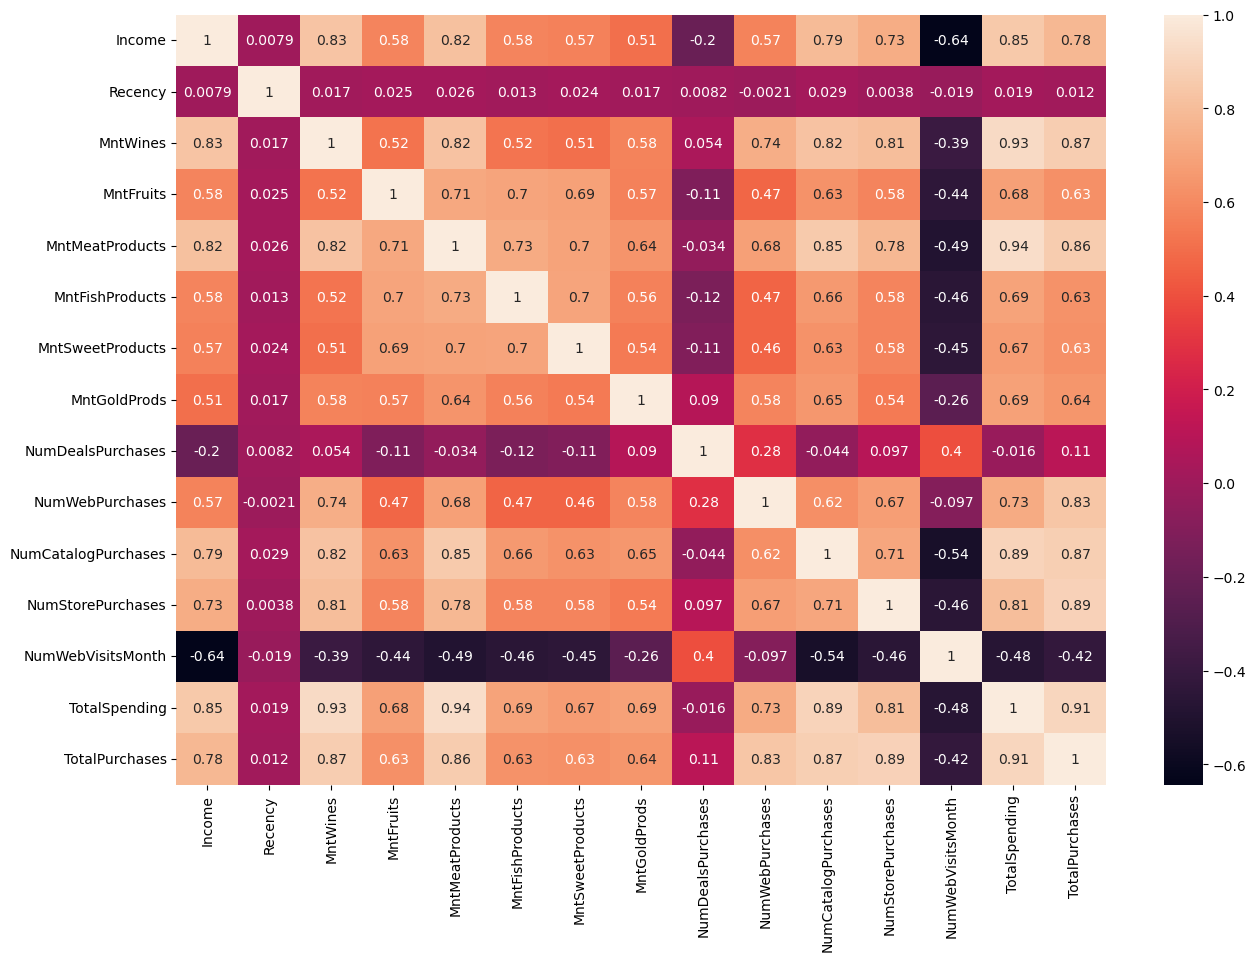

In [319]:
# korelasi spearman (distribusi tidak normal) dan menunjukkan nilai korelasi
figure = plt.figure(figsize=(15, 10))

sns.heatmap(numerik.corr(method='spearman'), annot=True)

In [320]:
# data yang sudah bersih, di export ke csv
df.to_csv('Data Capstone Supermarket Customers_New.csv', index=False)

# Analisis Bisnis

## Product Category Sales


Analisis Penjualan Kategori Produk dalam Persentase:
           Category  Total_Sales  Percentage (%)
0          MntWines       673456           50.25
1         MntFruits        58298            4.35
2   MntMeatProducts       368501           27.50
3   MntFishProducts        83054            6.20
4  MntSweetProducts        59672            4.45
5      MntGoldProds        97160            7.25


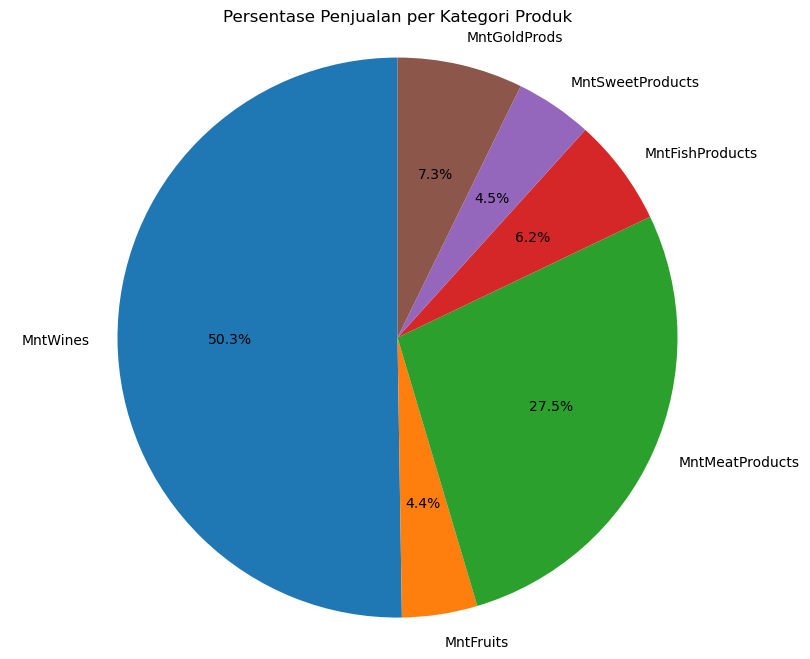

In [244]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
# Karena data disediakan sebagai dokumen, asumsikan sudah dalam format DataFrame
# Jika ingin membaca dari file CSV, gunakan: df = pd.read_csv('Data Capstone Supermarket Customers_New.csv')
# Untuk contoh ini, saya akan gunakan data yang sudah ada

# Kolom kategori produk
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                  'MntSweetProducts', 'MntGoldProds']

# Menghitung total penjualan per kategori
product_sales = df[product_columns].sum()

# Menghitung total penjualan keseluruhan
total_sales = product_sales.sum()

# Menghitung persentase per kategori
percentage_sales = (product_sales / total_sales * 100).round(2)

# Membuat DataFrame untuk hasil
result_df = pd.DataFrame({
    'Category': product_sales.index,
    'Total_Sales': product_sales.values,
    'Percentage (%)': percentage_sales.values
})

# Menampilkan hasil
print("\nAnalisis Penjualan Kategori Produk dalam Persentase:")
print(result_df)

# Visualisasi dengan pie chart
plt.figure(figsize=(10, 8))
plt.pie(percentage_sales, labels=product_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Penjualan per Kategori Produk')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Campaigns Performance


Analisis Performa Kampanye dalam Persentase:
       Campaign  Total_Accepted  Percentage (%)
0  AcceptedCmp1             141            6.38
1  AcceptedCmp2              30            1.36
2  AcceptedCmp3             163            7.37
3  AcceptedCmp4             163            7.37
4  AcceptedCmp5             160            7.24
5      Response             332           15.02


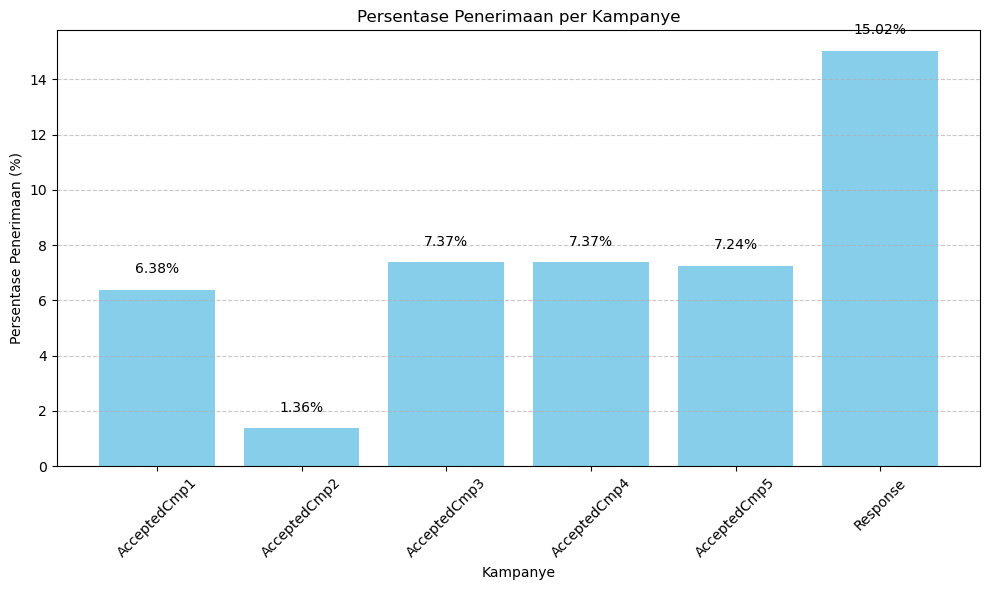

In [246]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
# Karena data sudah disediakan, asumsikan dalam format DataFrame
# Jika ingin membaca dari file, gunakan: df = pd.read_csv('Data Capstone Supermarket Customers_New.csv')

# Kolom kampanye yang akan dianalisis
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Menghitung total penerimaan (1) untuk setiap kampanye
campaign_acceptance = df[campaign_columns].sum()

# Menghitung total baris (jumlah pelanggan)
total_customers = len(df)

# Menghitung persentase penerimaan untuk setiap kampanye
percentage_acceptance = (campaign_acceptance / total_customers * 100).round(2)

# Membuat DataFrame untuk hasil
result_df = pd.DataFrame({
    'Campaign': campaign_acceptance.index,
    'Total_Accepted': campaign_acceptance.values,
    'Percentage (%)': percentage_acceptance.values
})

# Menampilkan hasil
print("\nAnalisis Performa Kampanye dalam Persentase:")
print(result_df)

# Visualisasi dengan bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(result_df['Campaign'], result_df['Percentage (%)'], color='skyblue')

# Menambahkan angka di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval}%', 
             ha='center', va='bottom', fontsize=10)

plt.title('Persentase Penerimaan per Kampanye')
plt.xlabel('Kampanye')
plt.ylabel('Persentase Penerimaan (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Korelasi Campaign dan Product

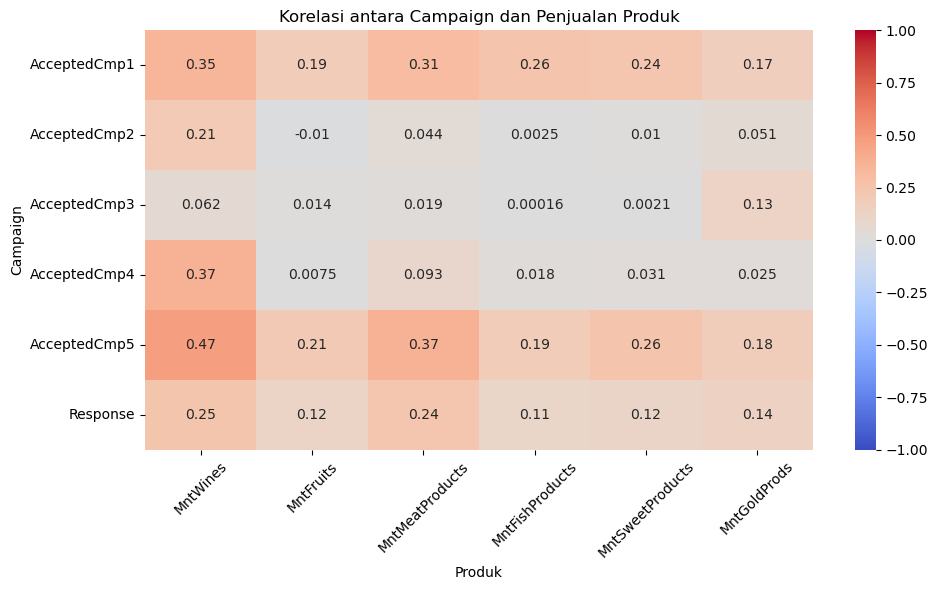

In [258]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data dari file CSV
data = pd.read_csv('Data Capstone Supermarket Customers_New.csv')

# Memilih kolom yang relevan untuk analisis korelasi
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Membuat subset data dengan kolom yang dipilih
selected_data = data[campaign_cols + product_cols]

# Menghitung matriks korelasi
correlation_matrix = selected_data.corr()

# Memilih hanya korelasi antara campaign dan produk
corr_campaign_product = correlation_matrix.loc[campaign_cols, product_cols]

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_campaign_product, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Korelasi antara Campaign dan Penjualan Produk')
plt.xlabel('Produk')
plt.ylabel('Campaign')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan plot
plt.show()

## Analisis Heatmap
1. Campaign dengan Pengaruh Terkuat:
AcceptedCmp5 memiliki korelasi tertinggi dengan penjualan produk, terutama pada wines (0.47) dan meat products (0.37). Ini menunjukkan bahwa campaign ini sangat efektif dalam mendorong penjualan wines dan meat products.
AcceptedCmp1 dan AcceptedCmp4 juga menunjukkan korelasi moderat dengan wines (0.35 dan 0.37) serta meat products (0.31 untuk AcceptedCmp1).
2. Campaign dengan Pengaruh Terlemah:
AcceptedCmp2 dan AcceptedCmp3 memiliki korelasi yang sangat lemah hingga hampir nol dengan semua kategori produk, menunjukkan bahwa campaign ini kurang efektif dalam mendorong penjualan.
3. Produk yang Paling Dipengaruhi:
MntWines memiliki korelasi tertinggi dengan hampir semua campaign, terutama AcceptedCmp5 (0.47), AcceptedCmp4 (0.37), dan AcceptedCmp1 (0.35). Ini menunjukkan bahwa wines adalah produk yang paling responsif terhadap campaign.
MntMeatProducts juga menunjukkan korelasi yang cukup signifikan dengan AcceptedCmp5 (0.37) dan AcceptedCmp1 (0.31).
4. Produk dengan Pengaruh Terendah:
MntFruits, MntFishProducts, MntSweetProducts, dan MntGoldProds secara umum memiliki korelasi yang lemah dengan semua campaign, menunjukkan bahwa penjualan produk ini kurang dipengaruhi oleh campaign.

# Efektivitas Campaign berdasarkan Penjualan Produk

In [259]:
import pandas as pd
import numpy as np

# Membaca data
df = pd.read_csv('Data Capstone Supermarket Customers_New.csv')

# Kolom kampanye dan produk
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Fungsi untuk menghitung persentase efektivitas
def calculate_campaign_effectiveness(df, campaign_cols, product_cols):
    result = {}
    
    for campaign in campaign_cols:
        result[campaign] = {}
        # Kelompokkan berdasarkan status kampanye (0 atau 1)
        grouped = df.groupby(campaign)[product_cols].sum()
        
        # Hitung total penjualan per produk untuk status kampanye = 1
        if 1 in grouped.index:
            total_sales_accepted = grouped.loc[1]
        else:
            total_sales_accepted = pd.Series(0, index=product_cols)
            
        # Hitung total penjualan keseluruhan per produk
        total_sales = df[product_cols].sum()
        
        # Hitung persentase
        percentages = (total_sales_accepted / total_sales * 100).round(2)
        
        for product in product_cols:
            result[campaign][product] = percentages[product]
    
    return result

# Jalankan analisis
effectiveness = calculate_campaign_effectiveness(df, campaign_cols, product_cols)

# Tampilkan hasil dalam format yang mudah dibaca
print("Efektivitas Kampanye terhadap Total Penjualan Produk (dalam %):\n")
for campaign in effectiveness:
    print(f"Kampanye: {campaign}")
    for product, percentage in effectiveness[campaign].items():
        print(f"  {product}: {percentage}%")
    print()

Efektivitas Kampanye terhadap Total Penjualan Produk (dalam %):

Kampanye: AcceptedCmp1
  MntWines: 15.87%
  MntFruits: 13.42%
  MntMeatProducts: 16.52%
  MntFishProducts: 15.53%
  MntSweetProducts: 15.27%
  MntGoldProds: 11.22%

Kampanye: AcceptedCmp2
  MntWines: 4.0%
  MntFruits: 1.18%
  MntMeatProducts: 2.04%
  MntFishProducts: 1.4%
  MntSweetProducts: 1.54%
  MntGoldProds: 2.05%

Kampanye: AcceptedCmp3
  MntWines: 9.16%
  MntFruits: 7.94%
  MntMeatProducts: 8.04%
  MntFishProducts: 7.38%
  MntSweetProducts: 7.45%
  MntGoldProds: 11.23%

Kampanye: AcceptedCmp4
  MntWines: 18.14%
  MntFruits: 7.67%
  MntMeatProducts: 10.64%
  MntFishProducts: 8.05%
  MntSweetProducts: 8.6%
  MntGoldProds: 8.14%

Kampanye: AcceptedCmp5
  MntWines: 20.79%
  MntFruits: 15.55%
  MntMeatProducts: 20.19%
  MntFishProducts: 14.39%
  MntSweetProducts: 17.26%
  MntGoldProds: 12.68%

Kampanye: Response
  MntWines: 24.73%
  MntFruits: 21.63%
  MntMeatProducts: 26.42%
  MntFishProducts: 20.59%
  MntSweetProducts

## Visualisasi Data untuk Memahami Efektivitas Kampanye

/var/folders/rg/fpsm52vj7h14_zh73d1zl1100000gn/T/ipykernel_4510/1874430380.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=campaign_data.index, y=campaign_data.values, ax=axes[i], palette='viridis')
/var/folders/rg/fpsm52vj7h14_zh73d1zl1100000gn/T/ipykernel_4510/1874430380.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=campaign_data.index, y=campaign_data.values, ax=axes[i], palette='viridis')
/var/folders/rg/fpsm52vj7h14_zh73d1zl1100000gn/T/ipykernel_4510/1874430380.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars 

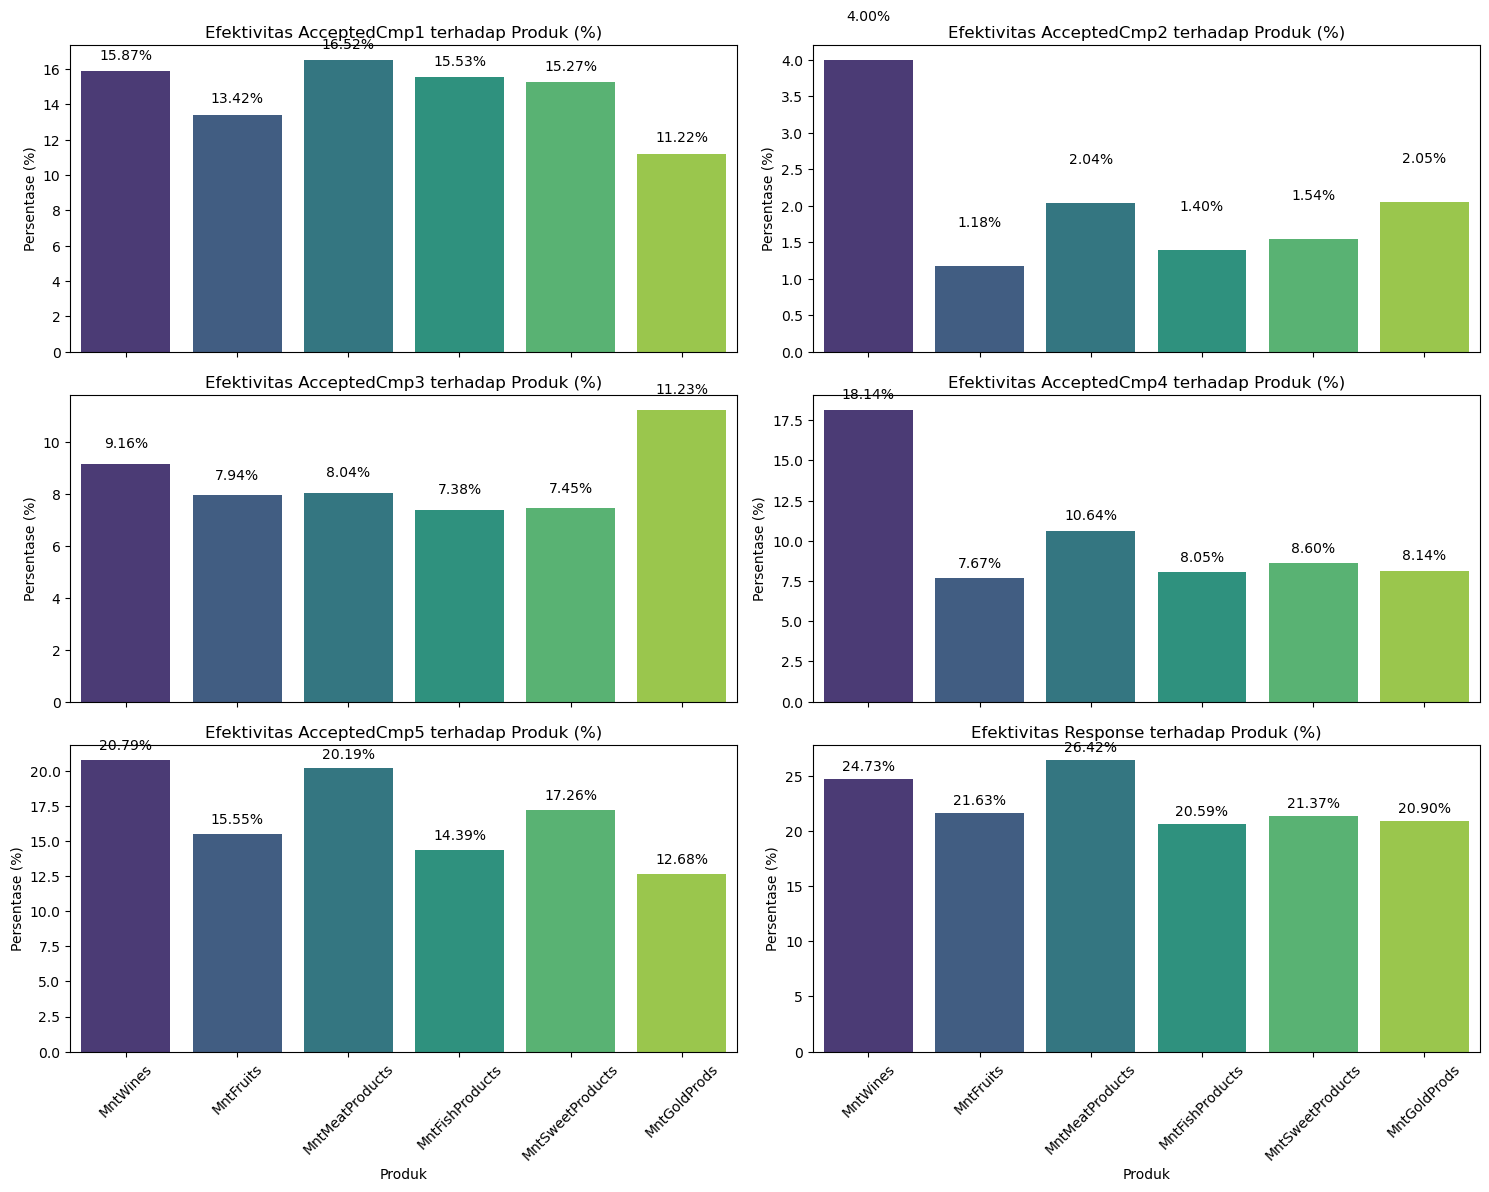

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data
df = pd.read_csv('Data Capstone Supermarket Customers_New.csv')

# Kolom kampanye dan produk
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Fungsi untuk menghitung persentase efektivitas
def calculate_campaign_effectiveness(df, campaign_cols, product_cols):
    result = {}
    
    for campaign in campaign_cols:
        result[campaign] = {}
        # Kelompokkan berdasarkan status kampanye (0 atau 1)
        grouped = df.groupby(campaign)[product_cols].sum()
        
        # Hitung total penjualan per produk untuk status kampanye = 1
        if 1 in grouped.index:
            total_sales_accepted = grouped.loc[1]
        else:
            total_sales_accepted = pd.Series(0, index=product_cols)
            
        # Hitung total penjualan keseluruhan per produk
        total_sales = df[product_cols].sum()
        
        # Hitung persentase
        percentages = (total_sales_accepted / total_sales * 100).round(2)
        
        for product in product_cols:
            result[campaign][product] = percentages[product]
    
    return result

# Jalankan analisis
effectiveness = calculate_campaign_effectiveness(df, campaign_cols, product_cols)

# Konversi hasil ke DataFrame untuk visualisasi
effectiveness_df = pd.DataFrame(effectiveness).T

# Visualisasi : Bar Plot untuk setiap kampanye dengan angka di atas bar
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=True)
axes = axes.flatten()

for i, campaign in enumerate(campaign_cols):
    # Ambil data untuk kampanye tertentu
    campaign_data = effectiveness_df.loc[campaign]
    
    # Plot bar
    bars = sns.barplot(x=campaign_data.index, y=campaign_data.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Efektivitas {campaign} terhadap Produk (%)')
    axes[i].set_ylabel('Persentase (%)')
    axes[i].set_xlabel('Produk')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Tambahkan angka di atas setiap bar
    for bar in bars.patches:
        height = bar.get_height()
        axes[i].text(
            bar.get_x() + bar.get_width() / 2,  # Posisi x (tengah bar)
            height + 0.5,                       # Posisi y (sedikit di atas bar)
            f'{height:.2f}%',                   # Teks (persentase)
            ha='center', va='bottom',           # Posisi teks horizontal dan vertikal
            fontsize=10
        )

# Atur layout
plt.tight_layout()
plt.show()

## Analisis Keseluruhan
1. Campaign dengan Efektivitas Tertinggi:
Response adalah yang paling efektif di semua kategori produk, terutama pada meat products (26.42%) dan wines (24.73%).
AcceptedCmp5 juga sangat efektif, terutama pada wines (20.79%) dan meat products (20.19%).
2. Campaign dengan Efektivitas Terendah:
AcceptedCmp2 memiliki efektivitas terendah di semua kategori produk, dengan persentase tertinggi hanya 2.05% pada sweet products.
AcceptedCmp3 juga memiliki efektivitas yang relatif rendah, dengan persentase tertinggi hanya 11.23% pada gold products.
3. Produk yang Paling Dipengaruhi:
MntMeatProducts memiliki persentase efektivitas tertinggi pada Response (26.42%), AcceptedCmp5 (20.19%), dan AcceptedCmp1 (16.02%).
MntWines juga sangat responsif, dengan persentase tertinggi pada Response (24.73%), AcceptedCmp5 (20.79%), dan AcceptedCmp4 (18.14%).
4. Produk dengan Efektivitas Terendah:
MntFruits cenderung memiliki efektivitas yang lebih rendah dibandingkan produk lain dalam beberapa campaign, misalnya pada AcceptedCmp4 (7.67%) dan AcceptedCmp3 (7.94%).
MntFishProducts juga menunjukkan efektivitas yang relatif rendah pada beberapa campaign, seperti AcceptedCmp3 (7.38%) dan AcceptedCmp4 (8.05%).

## Rekomendasi
1. Fokus pada Response dan AcceptedCmp5:
Response dan AcceptedCmp5 adalah campaign paling efektif dalam mendorong penjualan, terutama untuk wines dan meat products. Strategi pemasaran sebaiknya memprioritaskan pendekatan ini untuk memaksimalkan hasil.
2. Evaluasi AcceptedCmp2:
Campaign ini sangat tidak efektif di semua kategori produk. Perlu evaluasi mendalam untuk menentukan apakah campaign ini dapat diperbaiki atau dialihkan ke strategi lain.
3. Tingkatkan Efektivitas pada Produk Tertentu:
Untuk produk seperti fruits dan fish products, yang memiliki efektivitas lebih rendah pada beberapa campaign (misalnya AcceptedCmp4 dan AcceptedCmp3), perlu strategi khusus untuk meningkatkan respons pelanggan. Gold products juga cenderung memiliki efektivitas yang lebih rendah dibandingkan produk lain, sehingga mungkin memerlukan pendekatan yang berbeda.
4. Targetkan Wines dan Meat Products:
Kedua kategori ini menunjukkan respons yang sangat baik terhadap campaign, terutama pada Response dan AcceptedCmp5. Fokuskan sumber daya pada produk ini untuk hasil maksimal.
5. Optimalisasi Campaign Lain:
AcceptedCmp1 dan AcceptedCmp4 menunjukkan efektivitas yang cukup baik pada wines dan meat products, tetapi kurang efektif pada produk lain. Pertimbangkan untuk menyesuaikan strategi campaign ini agar lebih merata di semua produk.

# Membuat Kategori Produk, Kategori Campaign, Kategori Shopping Channel

In [223]:
# Ubah dari wide format ke long format
# Kolom kategori produk yang akan dipivot
product_columns = [
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds"
]

# Transformasi ke long format
df_long = df.melt(
    id_vars=["ID"],  # Kolom unik untuk identifikasi user
    value_vars=product_columns,
    var_name="ProductType",
    value_name="Spending"
)

# Simpan hasil ke file CSV agar bisa diupload ke Looker Studio

df_long.to_csv("Supermarket_ProductSpending_LongFormat.csv")

df_long.head()

,ID,ProductType,Spending
0,5524,MntWines,635
1,2174,MntWines,11
2,4141,MntWines,426
3,6182,MntWines,11
4,5324,MntWines,173


In [225]:
# Kolom campaign yang ingin diubah menjadi satu kolom kategori
campaign_columns = [
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response"
]

# Transformasi ke long format
df_campaign_long = df.melt(
    id_vars=["ID"],
    value_vars=campaign_columns,
    var_name="Kategori_Campaign",
    value_name="Accepted"
)

# Simpan hasil ke file CSV agar bisa diupload ke Looker Studio
df_campaign_long.to_csv("Supermarket_CampaignAcceptance_LongFormat.csv")

df_campaign_long.head()

,ID,Kategori_Campaign,Accepted
0,5524,AcceptedCmp1,0
1,2174,AcceptedCmp1,0
2,4141,AcceptedCmp1,0
3,6182,AcceptedCmp1,0
4,5324,AcceptedCmp1,0


In [254]:
# Buat kategori Place dengan melt
place_df = df.melt(
    id_vars=['ID'],
    value_vars=[
        'NumWebPurchases', 'NumCatalogPurchases',
        'NumStorePurchases'
    ],
    var_name='Place_Type',
    value_name='Place_Value'
)

# Preview hasilnya
place_df.head(10)

place_df.to_csv("Supermarket_Place.csv")

place_df.head()

,ID,Place_Type,Place_Value
0,5524,NumWebPurchases,8
1,2174,NumWebPurchases,1
2,4141,NumWebPurchases,8
3,6182,NumWebPurchases,2
4,5324,NumWebPurchases,5
